In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


Задание 1

Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.

In [ ]:
df = pd.read_excel('https://edu.tinkoff.ru/media/edu-files-ext-101/1-43a9e0c3-25b8-4b18-af1b-258eee3ed597.xls')
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN


In [ ]:
year_b = list(map(lambda x: int(str(x)[0:4]), df.birth_dt))
month_b = list(map(lambda x: int(str(x)[5:7]), df.birth_dt))
day_b = list(map(lambda x: int(str(x)[8:10]), df.birth_dt))
year_reg = list(map(lambda x: int(str(x)[0:4]), df.reg_dttm))
month_reg = list(map(lambda x: int(str(x)[5:7]), df.reg_dttm))
day_reg = list(map(lambda x: int(str(x)[8:10]), df.reg_dttm))


In [ ]:
def get_age(year_b, month_b, day_b, year_reg, month_reg, day_reg):
  age = year_reg - year_b
  if month_reg < month_b:
      age -= 1
  elif month_reg == month_b and day_reg < day_b:
      age -= 1
  return age

age=[]
for i in range(len(year_b)):
  age.append(get_age(year_b[i], month_b[i], day_b[i], year_reg[i], month_reg[i], day_reg[i]))
df['age'] = age

In [ ]:
df['month_reg'] = month_reg

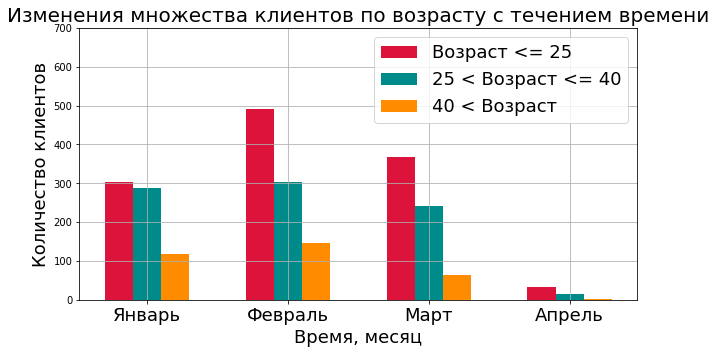

In [ ]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

plt.title("Изменения множества клиентов по возрасту с течением времени", fontsize=20)
plt.xlabel("Время, месяц", fontsize=18)
plt.ylabel("Количество клиентов", fontsize=18)

names = ["Январь", "Февраль", "Март", "Апрель"]
pos = np.arange(len(names))
w = 0.2
ax.set_xticks(pos)
ax.set_xticklabels(names, rotation=0, fontsize=18)
ax.grid()

tmp1 = df[df['age'] <= 25][['age', 'month_reg']]
tmp2 = df[(25 < df['age']) & (df['age'] <= 40)][['age', 'month_reg']]
tmp3 = df[40 < df['age']][['age', 'month_reg']]

ax.bar(pos-w, list(tmp1.groupby(by=['month_reg']).agg('count')['age']), width=w, color="crimson", label="Возраст <= 25", log=False)
ax.bar(pos,   list(tmp2.groupby(by=['month_reg']).agg('count')['age']), width=w, color="darkcyan",  label="25 < Возраст <= 40", log=False)
ax.bar(pos+w, list(tmp3.groupby(by=['month_reg']).agg('count')['age']), width=w, color="darkorange",  label="40 < Возраст", log=False)
plt.ylim(0,700)

ax.legend(loc='best', fontsize=18)

plt.show()

Задание 2

Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.


In [ ]:
kol_all = [0] * 55
kol_util = [0] * 55

for i, age in enumerate(df['age']):
  kol_all[age - 18] += 1
  if not np.isnan(df['purchase_id'][i]):
    kol_util[age - 18] += 1

conv = []
for i in range(0, len(kol_all), 5):
  kol_all[i] += kol_all[i+1] + kol_all[i+2] + kol_all[i+3] + kol_all[i+4]
  kol_util[i] += kol_util[i+1] + kol_util[i+2] + kol_util[i+3] + kol_util[i+4]
  if kol_all[i] != 0:
    conv.append(kol_util[i] * 100 // kol_all[i])
  else:
    conv.append(0)


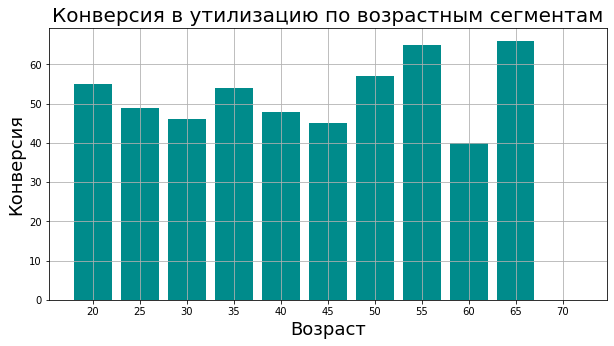

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
    
plt.title("Конверсия в утилизацию по возрастным сегментам", fontsize=20)
plt.xlabel("Возраст", fontsize=18)
plt.ylabel("Конверсия", fontsize=18)
     
y_pos = np.arange(0, max(conv), 10)
ax.set_yticklabels(y_pos)

names = np.arange(20, 75, 5)
x_pos = np.arange(len(names))
ax.set_xticks(x_pos)
ax.set_xticklabels(names)

ax.bar(x_pos, conv, color="darkcyan")
   
plt.grid()

plt.show()

Задание 3

Постройте диаграмму (или график), которая показывает, как скорость утилизации влияет на размер первой покупки.


In [ ]:
import string
kol_day_util = [-1] * len(df['client_id'])
flag = 0
for i in range(len(df['client_id'])):
  if not np.isnan(df['purchase_amt'][i]):
    tmp = str(df['purchase_dt'][i] - df['reg_dttm'][i]).split("days")
    if int(tmp[0].strip()) < 0:
      tmp[0] = int(0)
    else: tmp[0] = int(tmp[0].strip())
  else:
    tmp = [-1]
  if i - 1 > 0 and df['client_id'][i] == df['client_id'][i - 1]:
    tmp[0] = -1
  kol_day_util[i] = tmp[0]

df['kol_day_util'] = kol_day_util


In [ ]:
list(tmp1.groupby(by=['month_reg']).agg('count')['age'])
tmp = df[ df['kol_day_util'] != -1][['purchase_amt', 'kol_day_util']]
l = tmp.groupby(by = ['kol_day_util']).mean('purchase_amt')

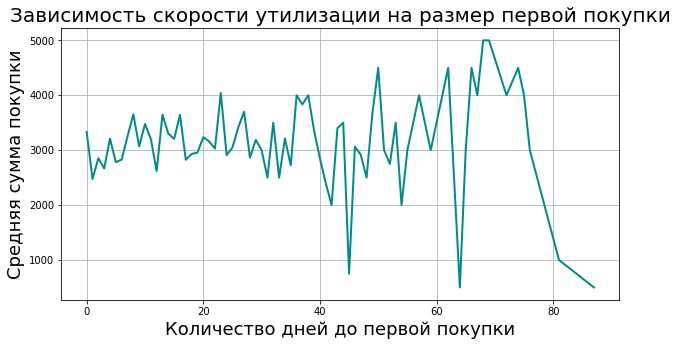

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
    
plt.title("Зависимость скорости утилизации на размер первой покупки", fontsize=20)
plt.xlabel("Количество дней до первой покупки", fontsize=18)
plt.ylabel("Средняя сумма покупки", fontsize=18)

lw = 2
plt.plot(l.index, l['purchase_amt'], color="darkcyan", linewidth=lw)

plt.grid()
    
plt.show()
   